# ANALIZA PORABE GORIVA

** S pomočjo analize podatkov bomo odgovorili na vprašanja, ki smo si jih zadali. ** 

Najprej bomo uvozili tabelo s podatki, ki jih bomo kasneje obdelovali.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

glavna_baza = pd.read_csv('./data/main_export_with_consumptions.csv')

glavna_baza

,make,model,year,cylinder number,displacement,fuel type,combined consumption,city consumption,highway consumption
0,Alfa Romeo,Spider Veloce 2000,1985,4,2.0,Regular,11.20,12.38,9.41
1,Bertone,X1/9,1985,4,1.5,Regular,10.69,11.76,9.04
2,Chevrolet,Corvette,1985,8,5.7,Regular,13.83,15.68,11.20
3,Chevrolet,Corvette,1985,8,5.7,Regular,13.83,15.68,11.76
4,Nissan,300ZX,1985,6,3.0,Regular,14.70,15.68,13.06
...,...,...,...,...,...,...,...,...,...
39661,Cadillac,XTS AWD,2019,6,3.6,Premium,13.06,14.70,10.22
39662,Cadillac,XTS AWD,2019,6,3.6,Regular,11.76,13.83,9.04
39663,Chevrolet,Impala,2019,6,3.6,Regular,10.69,12.38,8.40
39664,Chevrolet,Impala,2019,6,3.6,Gasoline or E85,10.69,13.06,8.40


# Vprašanja in odgovori

Pri zastavljenih vprašanjih, ki se nanašajo na povprečno porabo goriva avtomobilov, so vsi podatki zapisani v enoti litri na 100 kilometrov.


## Kako se povprečne porabe avtomobilov priljubljenih znamk razlikujejo med sabo?

Najprej smo v tabeli poiskali vse vnose iskane znamke, nato smo jim izračunali povprečno porabo ter jo zapisali v novo nastali slovar. Ko se je postopek zaključil za vse znamke, se je iz slovarja nato izdelal objekt tipa DataFrame iz knjižnice pandas. Potem smo lahko podatke zlahka vizualizirali. Spodaj imamo namreč tabelo, kjer je razvidna povprečna poraba glede na posamezno znamko avtomobila. Pod tabelo so podatki o povprečni porabi predstavljeni še s stolpičnim diagramom. 

,znamka,povprecna poraba
0,Audi,11.85
1,BMW,11.97
2,Chevrolet,13.35
3,Ford,13.52
4,Honda,9.39
5,Hyundai,10.10
6,Kia,10.21
7,MINI,8.47
8,Mazda,11.05
9,Mercedes-Benz,13.13


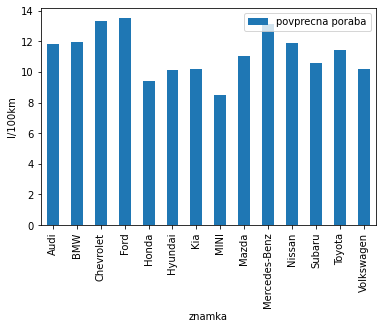

In [2]:
povprecje_znamk_slovar = {'znamka':[], 'povprecna poraba':[]}
znamke = [
    'Audi', 'BMW', 'Chevrolet', 
    'Ford', 'Honda', 'Hyundai', 'Kia',
    'MINI', 'Mazda', 'Mercedes-Benz',
    'Nissan', 'Subaru', 'Toyota', 'Volkswagen']
for a in znamke:
    temp = glavna_baza[glavna_baza.make == a]
    povprecje_znamk_slovar['znamka'].append(a)
    povprecje_znamk_slovar['povprecna poraba'].append(temp['combined consumption'].mean())
povprecje_znamk = pd.DataFrame.from_dict(povprecje_znamk_slovar)

graf = povprecje_znamk.plot.bar(x='znamka')
graf.set_ylabel('l/100km')
round(povprecje_znamk, 2)

** Ugotovitve: **

Opazimo, da imajo med izbranimi znamkami najmanjšo povprečno porabo avtomobili znamke MINI, največjo povprečno porabo pa avtomobili znamke Ford. Vidno je tudi, da so razlike v povprečni porabi med znamkami precej velike.

Pri tej obdelavi smo se omejili na določene avtomobilske znamke, ki so med kupci bolj priljubljene in splošno bolj poznane. Omenimo, da smo pri povprečni porabi vključili modele avtomobilov, izdelanih od leta 1985 do leta 2020. Prav tako se zavedamo dejstva, da imajo posamezne znamke več modelov z večjo porabo kot nekatere druge, to namreč pride še posebej do izraza pri znamkah visokocenovnih avtomobilov.

Zaključimo torej, da je prvo postavljeno vprašanje precej splošno in odgovor nanj nima bistvene vrednosti, saj smo zajeli ogromno količino podatkov in se nismo omejili na določene parametre. Vseeno poudarimo, da gre za naivno vprašanje, ki si ga posameznik postavi na začetku obdelave, odgovor pa predstavlja nekakšen uvod v nadaljnjo obdelavo.

## Kako se med nemškimi znamkami višjega cenovnega razreda Audi, BMW in Mercedes-Benz razlikuje povprečna poraba skozi leta?

Generiramo tabelo povprečne porabe skozi leta za nemške znamke višjega cenovnega razreda, Audi, BMW in Mercedes-Benz. Podatke lažje preberemo iz linijskega diagrama.

,leto,Audi,BMW,Mercedes-Benz
0,1984,12.71,11.74,12.06
1,1985,12.73,12.45,14.28
2,1986,12.48,13.22,13.07
3,1987,12.72,14.08,12.53
4,1988,12.44,14.52,13.74
5,1989,12.48,14.74,14.21
6,1990,13.04,13.94,14.30
7,1991,13.28,14.79,13.85
8,1992,13.06,14.42,16.11
9,1993,13.21,13.97,14.05


Text(0, 0.5, 'l/100km')

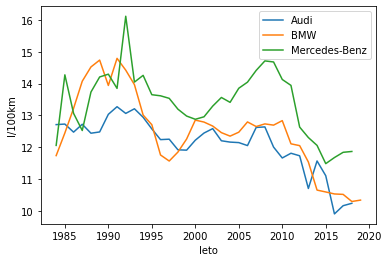

In [4]:
leta = list(dict.fromkeys(glavna_baza['year']))
leta.sort()
poraba_po_letih_slovar = {'leto' : leta}
poraba_po_letih = pd.DataFrame.from_dict(poraba_po_letih_slovar);
znamke = ['Audi', 'BMW', 'Mercedes-Benz']

for znamka in znamke:
    povprecje = []
    for leto in leta:
        temp = glavna_baza.loc[
            (glavna_baza['make'] == znamka) &
            (glavna_baza['year'] == leto)]

        povprecje.append(temp['combined consumption'].astype(float).mean())
    poraba_po_letih[znamka] = povprecje

display(round(poraba_po_letih, 2))
graf = poraba_po_letih.plot(x='leto')
graf.set_ylabel('l/100km')
    

** Ugotovitve: ** 

Na linijskem diagramu je lepo razvidno, da se je povprečna poraba avtomobilov vseh treh obravnavanih znamk, izdelanih med letoma 1985 in 2020, občutno znižala, kar lahko pripišemo očitnemu tehnološkemu napredku in raznim izboljšavam pri izdelavi avtomobilov.

Vseeno lahko opazimo, da je poraba pri znamki avtomobilov Mercedes-Benz že več desetletij višja v primerejavi s konkurenčnima znamkama BMW in Audi. Tudi najnovejši modeli znamke Mercedes-Benz imajo povprečno porabo višjo od avtomobilov znamke BMW oziroma Audi.

## Kako se je prostornina motorja pri italijaskih luksuznih znamkah Ferrari in Lamborghini spreminjala po letih?

V spodnji tabeli lahko za vsako leto od 1985 do 2020 razberemo povprečno prostornino motorjev za italijanski luksuzni avtomobilski znamki Ferrari in Lamborghini. Podatki so predstavljeni tudi z linijskim diagramom.

,leto,Ferrari,Lamborghini
0,1984,NaN,4.80
1,1985,3.57,NaN
2,1986,3.77,5.20
3,1987,3.77,5.20
4,1988,3.77,5.20
5,1989,3.62,5.20
6,1990,3.65,5.45
7,1991,3.90,5.70
8,1992,3.60,5.70
9,1993,3.70,5.70


Text(0, 0.5, 'l')

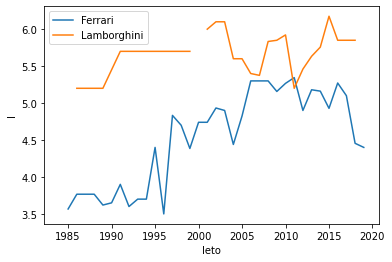

In [6]:
prostornina_po_letih_slovar = {'leto': leta}
prostornina_po_letih = pd.DataFrame.from_dict(prostornina_po_letih_slovar)
znamke = ['Ferrari', 'Lamborghini']

for znamka in znamke:
    povprecje = []
    for leto in leta:
        temp = glavna_baza.loc[
            (glavna_baza['make'] == znamka) &
            (glavna_baza['year'] == leto)]

        povprecje.append(temp['displacement'].astype(float).mean())
    prostornina_po_letih[znamka] = povprecje

display(round(prostornina_po_letih, 2))
graf = prostornina_po_letih.plot(x='leto')
graf.set_ylabel('l')


** Ugotovitve: **

Iz linijskega diagrama hitro opazimo, da je bila povprečna prostornina motorja avtomobilov znamke Lamborghini že v preteklosti večja od prostornine avtomobilov znamke Ferrari. Ta razlika v povprečni prostornini med znamkama se je ohranila tudi pri današnjih modelih avtomobilov.

Iz zgornje tabele lahko razberemo, da podatka o povprečni prostornini motorja za leti 1985 in 2000 pri znamki Lamborghini ni mogoče pridobiti. Prav tako je graf za znamko Lamborghini pri letu 2000 pretrgan. Razlog za to je odsotnost podatkov v podatkovni bazi za omenjeni leti.

Omenimo še, da pri računanju povprečne prostornine nismo razlikovali med številom cilindrov za posamezne modele avtomobilov, kar delno posploši naše ugotovitve. Za večjo natančnost bi namreč morali upoštevati tudi ta podatek.



## Kako sta se po letih spreminjali povprečna mestna in avtocestna poraba pri avtomobilski znamki Toyota?

V spodnji tabeli lahko za vsako leto od 1985 do 2020 odčitamo povprečno mestno in avtocestno porabo za avtomobilsko znamko Toyota. Spodaj imamo tudi linijski diagram, ki podatke po letih predstavi bolj pregledno. 

,leto,mestna poraba,avtocestna poraba
0,1984,11.05,9.32
1,1985,11.21,9.41
2,1986,12.23,10.09
3,1987,12.19,9.98
4,1988,12.42,10.12
5,1989,12.76,10.34
6,1990,13.12,10.46
7,1991,13.50,10.72
8,1992,13.81,10.79
9,1993,14.53,11.47


Text(0, 0.5, 'l/100km')

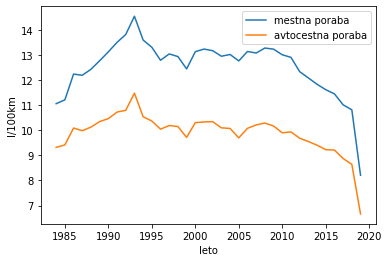

In [17]:
toyota_poraba_slovar = {'leto': leta, 'mestna poraba': [], 'avtocestna poraba': []}
kriterija = ['city consumption', 'highway consumption']

for leto in leta:
    temp = glavna_baza[glavna_baza.make == 'Toyota']
    temp = temp[temp.year == leto]
    toyota_poraba_slovar['mestna poraba'].append(temp['city consumption'].mean())
    toyota_poraba_slovar['avtocestna poraba'].append(temp['highway consumption'].mean())

toyota_poraba = pd.DataFrame.from_dict(toyota_poraba_slovar)
display(round(toyota_poraba, 2))
graf = toyota_poraba.plot(x='leto')
graf.set_ylabel('l/100km')

** Ugotovitve: **

Kot smo pričakovali, se izkaže, da je povprečna mestna poraba pri avtomobilih znamke Toyota pri vsakem letu večja od povprečne avtocestne porabe. V grobem bi lahko rekli, da razlika med povprečno mestno in avtocestno porabo za posamezno leto ne odstopa za nobeno leto. 

Na linijskem diagramu vidimo, da sta povprečna mestna in avtocestna poraba narasli v letu 1993, nato pa upadli. Še posebej pri tem letu je lepo vidna korelacija med povprečno avtocestno in mestno porabo. 

Opazimo, da sta tako povprečna mestna kot avtocestna poraba v zadnjih letih precej upadli. Še posebej je to očitno za povprečno mestno porabo, kar lahko pripišemo razvoju avtomobilov na hibridni pogon. Hibridi namreč pri mestni vožnji izkoriščajo tudi električno energijo in posledično se povprečna poraba goriva pri mestni vožnji precej zmanjša.

## Zaključek

Povzemimo naše ugotovitve pri obdelavi podatkov.

- Povprečne porabe goriva lahko med posameznimi avtomobilskimi znamkami precej varirajo.
- Med nemškimi visokocenovnimi avtomobilskimi znamkami Mercedes-Benz, BMW in Audi je povprečna poraba že vrsto let višja pri znamki Mercedes-Benz.
- Avtomobili italijanske luksuzne znamke Lamborghini imajo povprečno delovno prostornino motorja večjo od luksuznih avtomobilov znamke Ferrari.
- Korelacija med povprečno mestno in avtocestno porabo goriva pri priljubljeni avtomobilski znamki Toyota se z leti ni spreminjala, obe porabi pa sta v zadnjih letih precej padli zaradi razvoja hibridnega pogona.